# Data Training

### Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import cv2
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import os

## Gestures List

In [2]:
gestures = ['fist', 'palm', 'swing']
test_data_dir = 'data/test'
train_data_dir = 'data/train'

In [3]:
train_Images = []
no_train_images = 1000

for gesture in gestures:
    for i in range(0, no_train_images):
        # print(train_data_dir + '/' + gesture + '/' + gesture + '_' + str(i) + '.png')
        image = cv2.imread(train_data_dir + '/' + gesture + '/' + gesture + '_' + str(i) + '.png')
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        train_Images.append(gray_image.reshape(89, 100, 1))

In [4]:
train_Labels = []
no_train_images = 1000

for i in range(0, len(gestures)):
    vect = [0] * len(gestures)
    vect[i] = 1
    for j in range(0, no_train_images):
        train_Labels.append(vect)

In [5]:
test_Images = []
no_test_images = 100

for gesture in gestures:
    for i in range(0, no_test_images):
        # print(train_data_dir + '/' + gesture + '/' + gesture + '_' + str(i) + '.png')
        image = cv2.imread(train_data_dir + '/' + gesture + '/' + gesture + '_' + str(i) + '.png')
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        test_Images.append(gray_image.reshape(89, 100, 1))

In [6]:
test_Labels = []
no_test_images = 100

for i in range(0, len(gestures)):
    vect = [0] * len(gestures)
    vect[i] = 1
    for j in range(0, no_test_images):
        test_Labels.append(vect)

In [7]:
print("Training Images: " + str(len(train_Images)))
print("Training Labels: " + str(len(train_Labels)))
print("Testing Images: " + str(len(test_Images)))
print("Testing Labels: " + str(len(test_Labels)))

Training Images: 3000
Training Labels: 3000
Testing Images: 300
Testing Labels: 300


#### (BUG) GPU memory overflow
> this is a workaround

In [8]:
#

method1 = False

if method1:
    import os
    os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
    tf.compat.v1.reset_default_graph()
    gpu_options.allow_growth = True
    os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

#

method2 = False

if method2:
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 0.7
    tf.compat.v1.keras.backend.set_session(
        tf.compat.v1.Session(config=config))

# 

method3 = False

if method3:
    physical_devices = tf.config.list_physical_devices('GPU')
    for device in physical_devices:
        tf.config.experimental.set_memory_growth(device, True)

### Transforming the input data

In [9]:
train_Images = np.array(train_Images)
train_Labels = np.array(train_Labels)
test_Images = np.array(test_Images)
test_Labels = np.array(test_Labels)

## Making CNN Model

In [10]:
tf.compat.v1.reset_default_graph()
model = models.Sequential([
    #cnn layers
    layers.Conv2D(filters = 32, activation='relu', kernel_size = (2,2), input_shape = (89,100,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, activation='relu', kernel_size = (2,2)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 128, activation='relu', kernel_size = (2,2)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 256, activation='relu', kernel_size = (2,2)),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(1000, activation = 'relu'),
    layers.Dropout((0.40)),
    layers.Dense(500, activation = 'relu'),
    layers.Dropout((0.40)),
    # layers.Dense(64, activation = 'relu'),
    layers.Dense(3, activation = 'softmax')
])

2021-12-16 08:52:26.253760: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-16 08:52:26.297785: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-16 08:52:26.298063: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-16 08:52:26.299120: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

In [ ]:
model.summary()

### Training

In [11]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [12]:
# Shuffle Training Data
train_Images, train_Labels = shuffle(train_Images, train_Labels, random_state=0)

In [13]:
history = model.fit(train_Images, train_Labels, epochs=50, validation_data = (test_Images, test_Labels))

2021-12-16 08:52:31.810960: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2021-12-16 08:52:33.363093: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8201
2021-12-16 08:52:34.453498: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


94/94 [==============================] - 7s 25ms/step - loss: 0.6420 - accuracy: 0.9550 - val_loss: 3.0132e-05 - val_accuracy: 1.0000
Epoch 2/50
94/94 [==============================] - 2s 18ms/step - loss: 9.8716e-04 - accuracy: 0.9997 - val_loss: 1.0812e-05 - val_accuracy: 1.0000
Epoch 3/50
94/94 [==============================] - 2s 18ms/step - loss: 4.6435e-05 - accuracy: 1.0000 - val_loss: 1.4872e-06 - val_accuracy: 1.0000
Epoch 4/50
94/94 [==============================] - 2s 19ms/step - loss: 1.1866e-05 - accuracy: 1.0000 - val_loss: 4.3738e-07 - val_accuracy: 1.0000
Epoch 5/50
94/94 [==============================] - 2s 19ms/step - loss: 1.4292e-05 - accuracy: 1.0000 - val_loss: 1.4921e-07 - val_accuracy: 1.0000
Epoch 6/50
94/94 [==============================] - 2s 18ms/step - loss: 1.1440e-06 - accuracy: 1.0000 - val_loss: 6.1453e-08 - val_accuracy: 1.0000
Epoch 7/50
94/94 [==============================] - 2s 18ms/step - loss: 2.6676e-06 - accuracy: 1.0000 - val_loss: 2.8156

### Saving Model

In [14]:
if not os.path.isdir('TrainedModel'):
    os.mkdir('TrainedModel')
model.save('./TrainedModel/')

2021-12-16 08:54:17.077710: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./TrainedModel/assets


## Model Sumary

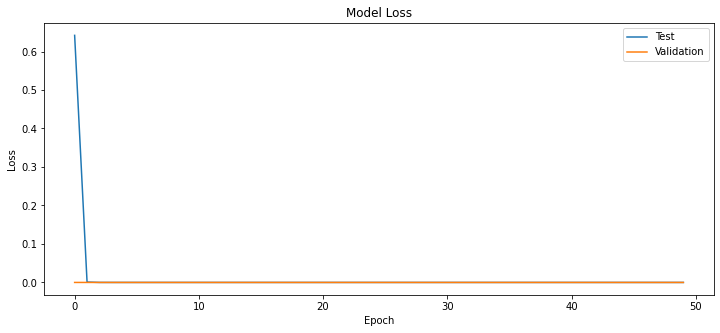

In [15]:
plt.figure(figsize = (12, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.1])
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model.evaluate(test_Images,  test_Labels, verbose=2)